In [205]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.layers import SimpleRNN
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
from tqdm import tqdm,trange
plt.style.use('fivethirtyeight')

In [206]:
# get data from yahoo
stock_data = web.DataReader('SCB', data_source='yahoo', start='2010-02-02', end='2022-03-03')
stock_data.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-02-22,4.38571,4.38571,4.38571,4.38571,0.0,4.38571
2010-02-23,4.38571,4.38571,4.38571,4.38571,0.0,4.38571
2010-02-24,4.40714,4.38571,4.38571,4.40714,7700.0,4.40714
2010-02-25,4.42857,4.40714,4.40714,4.42857,16100.0,4.42857
2010-02-26,4.43571,4.42857,4.42857,4.43571,700.0,4.43571


In [207]:
stock_data['Close'].values

array([4.38570976, 4.38570976, 4.40713978, ..., 1.79999995, 1.83000004,
       1.83000004])

In [208]:
stock_data.shape

(3028, 6)

Text(0, 0.5, 'Close Price')

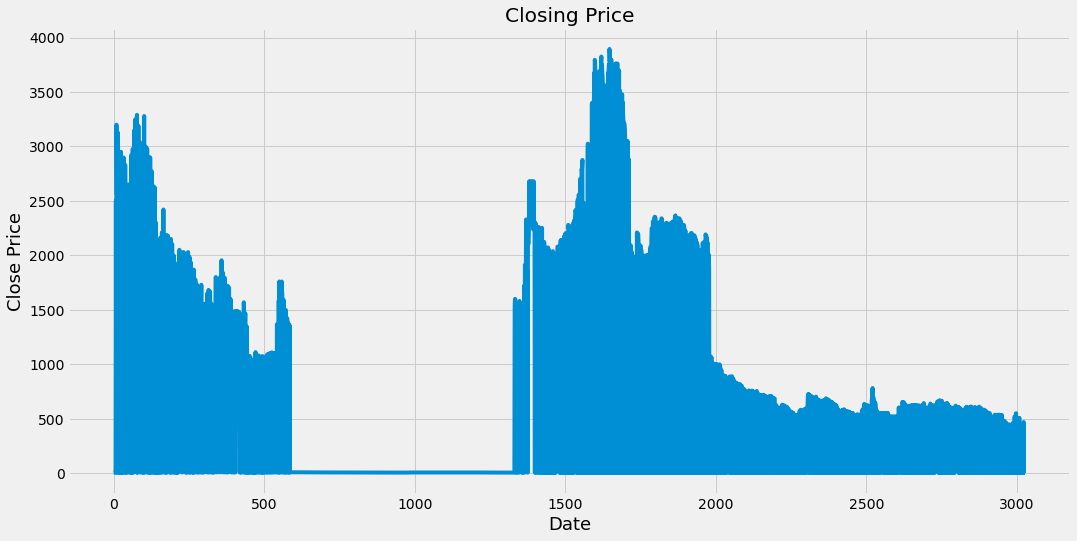

In [209]:
# Plot เบี้องต้นออกมาดูราคากันหน่อย
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(stock_data['Close'].values)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
#Text(0, 0.5, 'Close Price')

In [210]:
# pull close price
data = stock_data.filter(['Close'])

#data to Numpy array
dataset = data.values

#train 80, test 20
#train with 80% of data
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

2423

In [211]:
# normalize
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# tran 80 % of data from scaled_data
train_data = scaled_data[:training_data_len, :]

x_train = [] 
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    

x_train, y_train = np.array(x_train), np.array(y_train)
# reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [212]:
# LSTM model
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
2363/2363 [==============================] - 51s 20ms/step - loss: 0.0363
Epoch 2/3
2363/2363 [==============================] - 46s 20ms/step - loss: 0.0338
Epoch 3/3
2363/2363 [==============================] - 47s 20ms/step - loss: 0.0313


In [213]:
# test data 20% of data
test_data = scaled_data[training_data_len - 60: , :] 

x_test = [] 
y_test = dataset[training_data_len: :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [214]:
predictions_LSTM = model.predict(x_test)
predictions_LSTM = scaler.inverse_transform(predictions_LSTM)
# root mean squared error
rmse_LSTM = np.sqrt(np.mean(predictions_LSTM - y_test)**2)
rmse_LSTM

6.605147840759971

C:\Users\Gantona\AppData\Local\Temp\ipykernel_34356\1680112383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions LSTM'] = predictions_LSTM


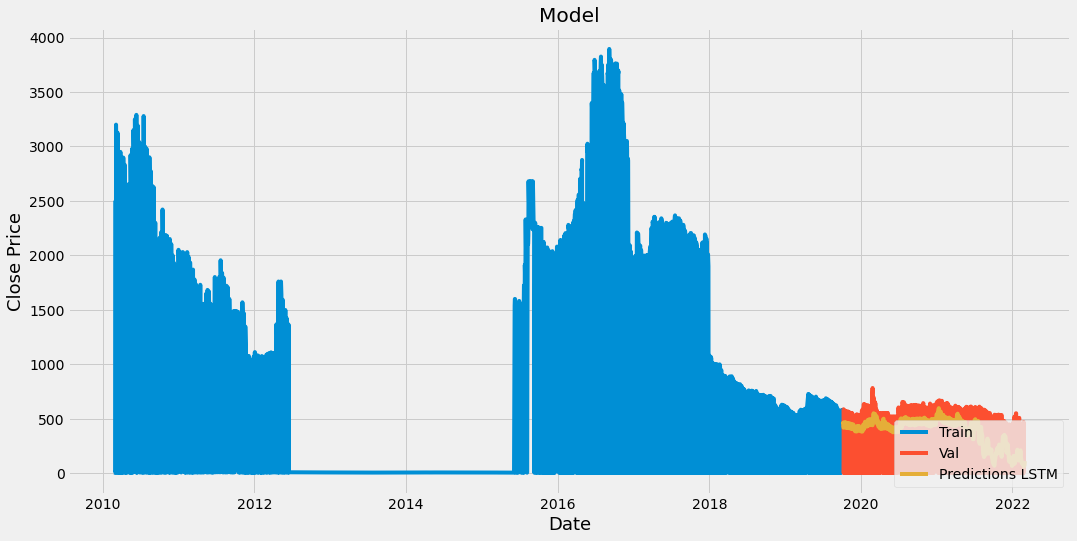

In [215]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions LSTM'] = predictions_LSTM

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions LSTM']])
plt.legend(['Train', 'Val', 'Predictions LSTM'] , loc='lower right')
plt.show()

In [160]:
valid

,Close,Predictions LSTM
Date,,
2019-10-07,580.00,330.576477
2019-10-08,580.00,347.204407
2019-10-09,580.00,337.198395
2019-10-10,587.00,316.214752
2019-10-11,1.02,309.362518
...,...,...
2022-02-24,470.00,-102.089874
2022-02-25,1.80,-107.879875
2022-02-28,1.80,-103.538261


# RNN

In [216]:
stock_data = web.DataReader('SCB', data_source='yahoo', start='1990-01-01', end='2222-01-01')
stock_data.head(10)

data = stock_data.filter(['Close'])

#แปลงข้อมูลใน data ให้เป็น Numpy array
dataset = data.values

#แบ่งข้อมูลแบบ train 80, test 20
#ดูว่า train 80% มีขนาดเท่าไร
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

2423

In [217]:
# ปรับ Scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# เลือก 80 % จาก scaled_data
train_data = scaled_data[:training_data_len, :]

x_train = [] 
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
#จากนั้นแปลงกับให้เป็น Numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
# reshape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
#x_train

In [218]:
# RNN model
regressor = Sequential()


regressor.add(SimpleRNN(units = 32, activation='tanh', return_sequences=True, 
                        input_shape= (x_train.shape[1],1)))
regressor.add(SimpleRNN(units = 32, activation='tanh', return_sequences=False))
regressor.add(Dense(units = 16))
regressor.add(Dense(units = 1))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
2363/2363 [==============================] - 34s 14ms/step - loss: 0.0397
Epoch 2/3
2363/2363 [==============================] - 32s 14ms/step - loss: 0.0316
Epoch 3/3
2363/2363 [==============================] - 32s 14ms/step - loss: 0.0292


In [219]:
# test data 20% of data
test_data = scaled_data[training_data_len - 60: , :] 

x_test = [] 
y_test = dataset[training_data_len: :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test_RNN = np.array(x_test)
x_test_RNN = np.reshape(x_test, (x_test_RNN.shape[0], x_test_RNN.shape[1], 1))

In [220]:
predictions_RNN= regressor.predict(x_test_RNN)
predictions_RNN = scaler.inverse_transform(predictions_RNN)
#  root mean squared error
rmse_RNN = np.sqrt(np.mean(predictions_RNN - y_test)**2)
rmse_RNN

12.874337632399945

In [222]:
#train = data[:training_data_len]
#valid = data[training_data_len:]
valid['Predictions RNN'] = predictions_RNN

valid.head(10)

,Close,Predictions LSTM,Predictions RNN
Date,,,
2019-10-07,580.00,453.889191,410.348755
2019-10-08,580.00,463.694702,490.951202
2019-10-09,580.00,440.301544,524.205750
2019-10-10,587.00,417.725098,518.381714
2019-10-11,1.02,419.994995,282.258423
2019-10-14,570.00,457.748962,445.844452
2019-10-15,576.00,468.347595,482.185425
2019-10-16,570.00,444.834320,533.172363
2019-10-17,573.00,421.056885,538.856384


In [167]:
valid.isnull().values.sum()

0

In [168]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [169]:
X = pd.DataFrame(valid[['Predictions LSTM','Predictions RNN']])
#X = X.drop("Date", axis='columns')
y = pd.DataFrame(valid['Close'])
lr = LinearRegression()
scores = []



In [170]:
X

,Predictions LSTM,Predictions RNN
Date,,
2019-10-07,330.576477,460.553284
2019-10-08,347.204407,388.801605
2019-10-09,337.198395,372.164124
2019-10-10,316.214752,324.807343
2019-10-11,309.362518,264.275543
...,...,...
2022-02-24,-102.089874,-181.187439
2022-02-25,-107.879875,-170.389313
2022-02-28,-103.538261,-144.833496


In [171]:
reg.fit(X,y)
# The coefficients
print ('Intercept: ', reg.intercept_)
print ('Coefficients: ', reg.coef_)

Intercept:  [214.20572]
Coefficients:  [[-0.900605   1.4628465]]


In [172]:
y_hat= reg.predict(X[['Predictions LSTM','Predictions RNN']])

rmse_lr = np.sqrt(np.mean(y_hat - y)**2)
rmse_lr

C:\Users\Gantona\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Close    0.000031
dtype: float64

In [173]:
valid['Predictions linear'] = y_hat

valid.head(10)

,Close,Predictions LSTM,Predictions RNN,Predictions linear
Date,,,,
2019-10-07,580.00,330.576477,460.553284,590.205627
2019-10-08,580.00,347.204407,388.801605,470.268768
2019-10-09,580.00,337.198395,372.164124,454.942169
2019-10-10,587.00,316.214752,324.807343,404.564392
2019-10-11,1.02,309.362518,264.275543,322.186829
2019-10-14,570.00,334.807495,468.554779,598.100098
2019-10-15,576.00,352.093140,401.758118,484.819305
2019-10-16,570.00,342.065918,374.884735,454.538239
2019-10-17,573.00,320.172638,335.340393,416.408142


In [194]:
valid

,Close,Predictions LSTM,Predictions RNN,Predictions linear
Date,,,,
2019-10-07,580.00,330.576477,460.553284,590.205627
2019-10-08,580.00,347.204407,388.801605,470.268768
2019-10-09,580.00,337.198395,372.164124,454.942169
2019-10-10,587.00,316.214752,324.807343,404.564392
2019-10-11,1.02,309.362518,264.275543,322.186829
...,...,...,...,...
2022-02-24,470.00,-102.089874,-181.187439,41.098969
2022-02-25,1.80,-107.879875,-170.389313,62.109467
2022-02-28,1.80,-103.538261,-144.833496,95.583626


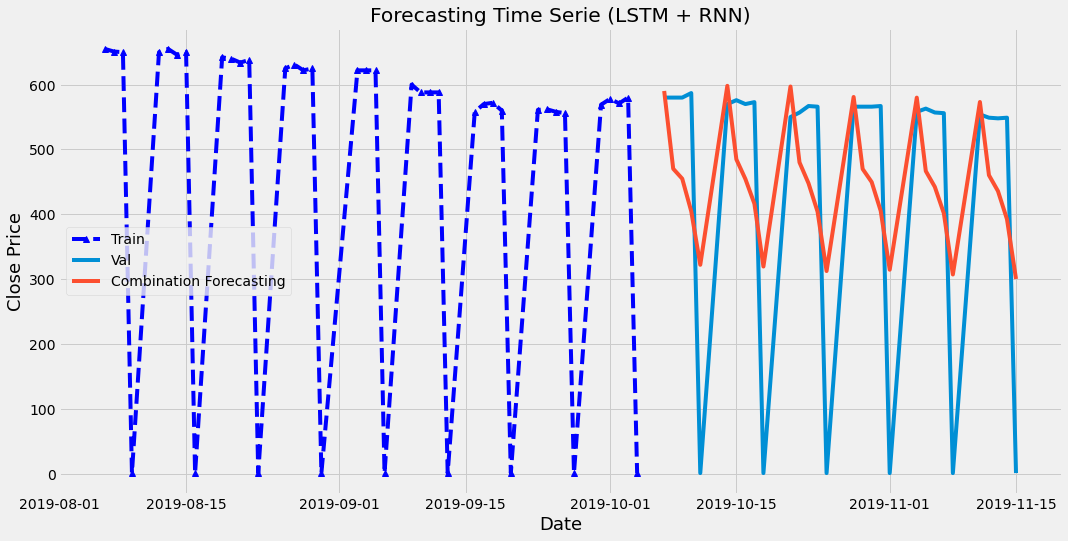

In [203]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.title('Forecasting Time Serie (LSTM + RNN)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'].iloc[2380:2423], '^--b')
plt.plot(valid[['Close', 'Predictions linear']].iloc[0:30])
plt.legend(['Train', 'Val', 'Combination Forecasting'] , loc='best')
plt.show()